In [1]:
import sys
sys.path.insert(0, '/home/marcelo/Workspace/MF_Model/Modules')

import mf_models as mf
import model_type as mt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)


In [2]:
vec_w_I = np.array([0.1, 1.0, 10])
vec_w_I_label = ["0.1", "1", "10"]
vec_tau_E = np.linspace(0.1, 100, 100)

df_mu = pd.DataFrame({vec_w_I[0]:np.zeros_like(vec_tau_E),
					vec_w_I[1]:np.zeros_like(vec_tau_E),
					vec_w_I[2]:np.zeros_like(vec_tau_E)})

df_sigma_V = pd.DataFrame({vec_w_I[0]:np.zeros_like(vec_tau_E),
						vec_w_I[1]:np.zeros_like(vec_tau_E),
						vec_w_I[2]:np.zeros_like(vec_tau_E)})

df_nu = pd.DataFrame({vec_w_I[0]:np.zeros_like(vec_tau_E),
					vec_w_I[1]:np.zeros_like(vec_tau_E),
					vec_w_I[2]:np.zeros_like(vec_tau_E)})

for w_I in vec_w_I:
	for i, tau_E in enumerate(vec_tau_E):
		model_type = mt.MFCoBaIF(wE_val = 0.5,
						wI_val = w_I,
						KE_val = 400,
						KI_val = 100,
						tauE_val = tau_E,
						tauI_val = 10,
						nuE_val = 0.005,
						nuI_val = 0.005)

		LV_model = mf.LangevinModel(model_type)
		LV_model.sigmaV
		mu, sigma = LV_model.model_type.data_parameters.substitute_parameters_values([LV_model.mu, LV_model.sigmaV])
		df_mu[w_I][i] = mu
		df_sigma_V[w_I][i] = sigma



/tmp/ipykernel_23378/712258877.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mu[w_I][i] = mu
/tmp/ipykernel_23378/712258877.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sigma_V[w_I][i] = sigma


In [36]:
df_mu_ad = pd.DataFrame({vec_w_I[0]:np.zeros_like(vec_tau_E),
					vec_w_I[1]:np.zeros_like(vec_tau_E),
					vec_w_I[2]:np.zeros_like(vec_tau_E)})

df_sigma_V_ad = pd.DataFrame({vec_w_I[0]:np.zeros_like(vec_tau_E),
						vec_w_I[1]:np.zeros_like(vec_tau_E),
						vec_w_I[2]:np.zeros_like(vec_tau_E)})

df_mu_mul = pd.DataFrame({vec_w_I[0]:np.zeros_like(vec_tau_E),
					vec_w_I[1]:np.zeros_like(vec_tau_E),
					vec_w_I[2]:np.zeros_like(vec_tau_E)})

df_sigma_V_mul = pd.DataFrame({vec_w_I[0]:np.zeros_like(vec_tau_E),
						vec_w_I[1]:np.zeros_like(vec_tau_E),
						vec_w_I[2]:np.zeros_like(vec_tau_E)})

n = 30000

for w_I in vec_w_I:
	print(w_I, end='\t')
	for i, tau_E in enumerate(vec_tau_E):
		print(i, end=' ')
		model_type = mt.MFCoBaIF(wE_val = 0.5,
						wI_val = w_I,
						KE_val = 400,
						KI_val = 100,
						tauE_val = tau_E,
						tauI_val = 10,
						nuE_val = 0.005,
						nuI_val = 0.005)

		LV_model = mf.LangevinModel(model_type)
		FP_model = mf.FokkerPlanckModel(LV_model, False)
		E_I = model_type.data_parameters.values[model_type.vec_E[2]]
		V_th = model_type.data_parameters.values[model_type.Vth]

		vec_Vk = np.linspace(E_I, V_th, n + 1)
		dV = (-50 + 80)/n

		nu = FP_model.calculate_firing_rate(vec_Vk)
		V_distr = FP_model.integrate_p0(vec_Vk)*nu
		
		mu = np.dot(V_distr, vec_Vk*dV) - nu*2*60
		mu2 = np.dot(V_distr, vec_Vk**2*dV) + nu*2*60**2

		df_mu_ad[w_I][i] = mu
		df_sigma_V_ad[w_I][i] = np.sqrt(mu2 - mu**2)
		# print(np.sqrt(mu2 - mu**2))
	
	print()

for w_I in vec_w_I:
	print(w_I, end='\t')
	for i, tau_E in enumerate(vec_tau_E):
		print(i, end=' ')
		model_type = mt.MFCoBaIF(wE_val = 0.5,
						wI_val = w_I,
						KE_val = 400,
						KI_val = 100,
						tauE_val = tau_E,
						tauI_val = 10,
						nuE_val = 0.005,
						nuI_val = 0.005)

		LV_model = mf.LangevinModel(model_type)
		FP_model = mf.FokkerPlanckModel(LV_model, True)
		E_I = model_type.data_parameters.values[model_type.vec_E[2]]
		V_th = model_type.data_parameters.values[model_type.Vth]

		vec_Vk = np.linspace(E_I, V_th, n + 1)
		dV = (-50 + 80)/n

		nu = FP_model.calculate_firing_rate(vec_Vk)
		V_distr = FP_model.integrate_p0(vec_Vk)*nu
		
		mu = np.dot(V_distr, vec_Vk*dV) - nu*2*60
		mu2 = np.dot(V_distr, vec_Vk**2*dV) + nu*2*60**2

		df_mu_mul[w_I][i] = mu
		df_sigma_V_mul[w_I][i] = np.sqrt(mu2 - mu**2)
		# print(np.sqrt(mu2 - mu**2))
	
	print()

0.1	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
1.0	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
10.0	0 

/home/marcelo/Workspace/MF_Model/Modules/mf_models.py:180: RuntimeWarning: overflow encountered in double_scalars
  vec_p0_fliped[j+1] = p0 * np.exp(dV * Bk) + dV * Hk * (np.exp(dV*Bk) - 1) / (dV * Bk)
/tmp/ipykernel_23378/496295897.py:41: RuntimeWarning: invalid value encountered in multiply
  V_distr = FP_model.integrate_p0(vec_Vk)*nu


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
0.1	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
1.0	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
10.0	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 

In [3]:
n = 30000

for w_I in vec_w_I:
	print(w_I, end='\t')
	for i, tau_E in enumerate(vec_tau_E):
		print(i, end=' ')
		model_type = mt.MFCoBaIF(wE_val = 0.5,
						wI_val = w_I,
						KE_val = 400,
						KI_val = 100,
						tauE_val = tau_E,
						tauI_val = 10,
						nuE_val = 0.005,
						nuI_val = 0.005)

		LV_model = mf.LangevinModel(model_type)
		FP_model = mf.FokkerPlanckModel(LV_model, True)
		E_I = model_type.data_parameters.values[model_type.vec_E[2]]
		V_th = model_type.data_parameters.values[model_type.Vth]

		vec_Vk = np.linspace(E_I, V_th, n + 1)

		df_nu[w_I][i] = FP_model.calculate_firing_rate (vec_Vk)
	
	print()

0.1	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
1.0	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
10.0	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 


In [33]:
fRate_data_path = "../../Data/fRate_data/"
V_data_path = "../../Data/V_data/"

df_nu_sim_read = pd.read_csv(f"{fRate_data_path}firing_rate_wI.dat", index_col=0)
df_mu_sim_read = pd.read_csv(f"{V_data_path}mean_V_ta_wI.dat", index_col=0)
df_sigma_V_sim_read = pd.read_csv(f"{V_data_path}var_V_ta_wI.dat", index_col=0)
df_mu_sim_th_read = pd.read_csv(f"{V_data_path}mean_V_ta_wI_th.dat", index_col=0)
df_sigma_V_sim_th_read = pd.read_csv(f"{V_data_path}var_V_ta_wI_th.dat", index_col=0)

df_nu_sim_read

,tauA,0.1,1,10
0,0.100000,0.00,0.00,0.00
1,0.100000,0.00,0.00,0.00
2,0.100000,0.00,0.00,0.00
3,1.109091,139.55,0.55,0.00
4,1.109091,139.50,0.55,0.00
...,...,...,...,...
295,98.990909,492.40,492.40,489.15
296,98.990909,492.55,492.30,489.20
297,100.000000,492.45,492.30,489.50
298,100.000000,492.45,492.35,489.25


In [34]:
index = list(range(0, 200, 3))
df_nu_sim = pd.DataFrame({vec_w_I[0]:np.zeros_like(vec_tau_E),
					vec_w_I[1]:np.zeros_like(vec_tau_E),
					vec_w_I[2]:np.zeros_like(vec_tau_E)})

df_mu_sim = pd.DataFrame({"tau_E": df_mu_sim_read['tauA'],
					vec_w_I[0]:df_mu_sim_read['0.1'], 
					vec_w_I[1]:df_mu_sim_read['1'],
					vec_w_I[2]:df_mu_sim_read['10']})

df_sigma_V_sim = pd.DataFrame({"tau_E": df_sigma_V_sim_read['tauA'],
					vec_w_I[0]:df_sigma_V_sim_read['0.1'], 
					vec_w_I[1]:df_sigma_V_sim_read['1'],
					vec_w_I[2]:df_sigma_V_sim_read['10']})

df_mu_sim_th = pd.DataFrame({"tau_E": df_mu_sim_th_read['tauA'],
					vec_w_I[0]:df_mu_sim_th_read['0.1'], 
					vec_w_I[1]:df_mu_sim_th_read['1'],
					vec_w_I[2]:df_mu_sim_th_read['10']})

df_sigma_V_sim_th = pd.DataFrame({"tau_E": df_sigma_V_sim_th_read['tauA'],
					vec_w_I[0]:df_sigma_V_sim_th_read['0.1'], 
					vec_w_I[1]:df_sigma_V_sim_th_read['1'],
					vec_w_I[2]:df_sigma_V_sim_th_read['10']})

for w_I, w_I_label in zip(vec_w_I, vec_w_I_label):
	for i in range(len(vec_tau_E)):
		df_nu_sim[w_I][i] = df_nu_sim_read[w_I_label][3*i]

In [6]:
df_error = pd.DataFrame({vec_w_I[0]:np.zeros_like(vec_tau_E),
						vec_w_I[1]:np.zeros_like(vec_tau_E),
						vec_w_I[2]:np.zeros_like(vec_tau_E)})

for w_I in vec_w_I:
	for i, (nu_sim, nu_analyt) in enumerate(zip(df_nu_sim[w_I], df_nu[w_I])):
		df_error[w_I][i] = np.abs(nu_sim - nu_analyt * 1000)


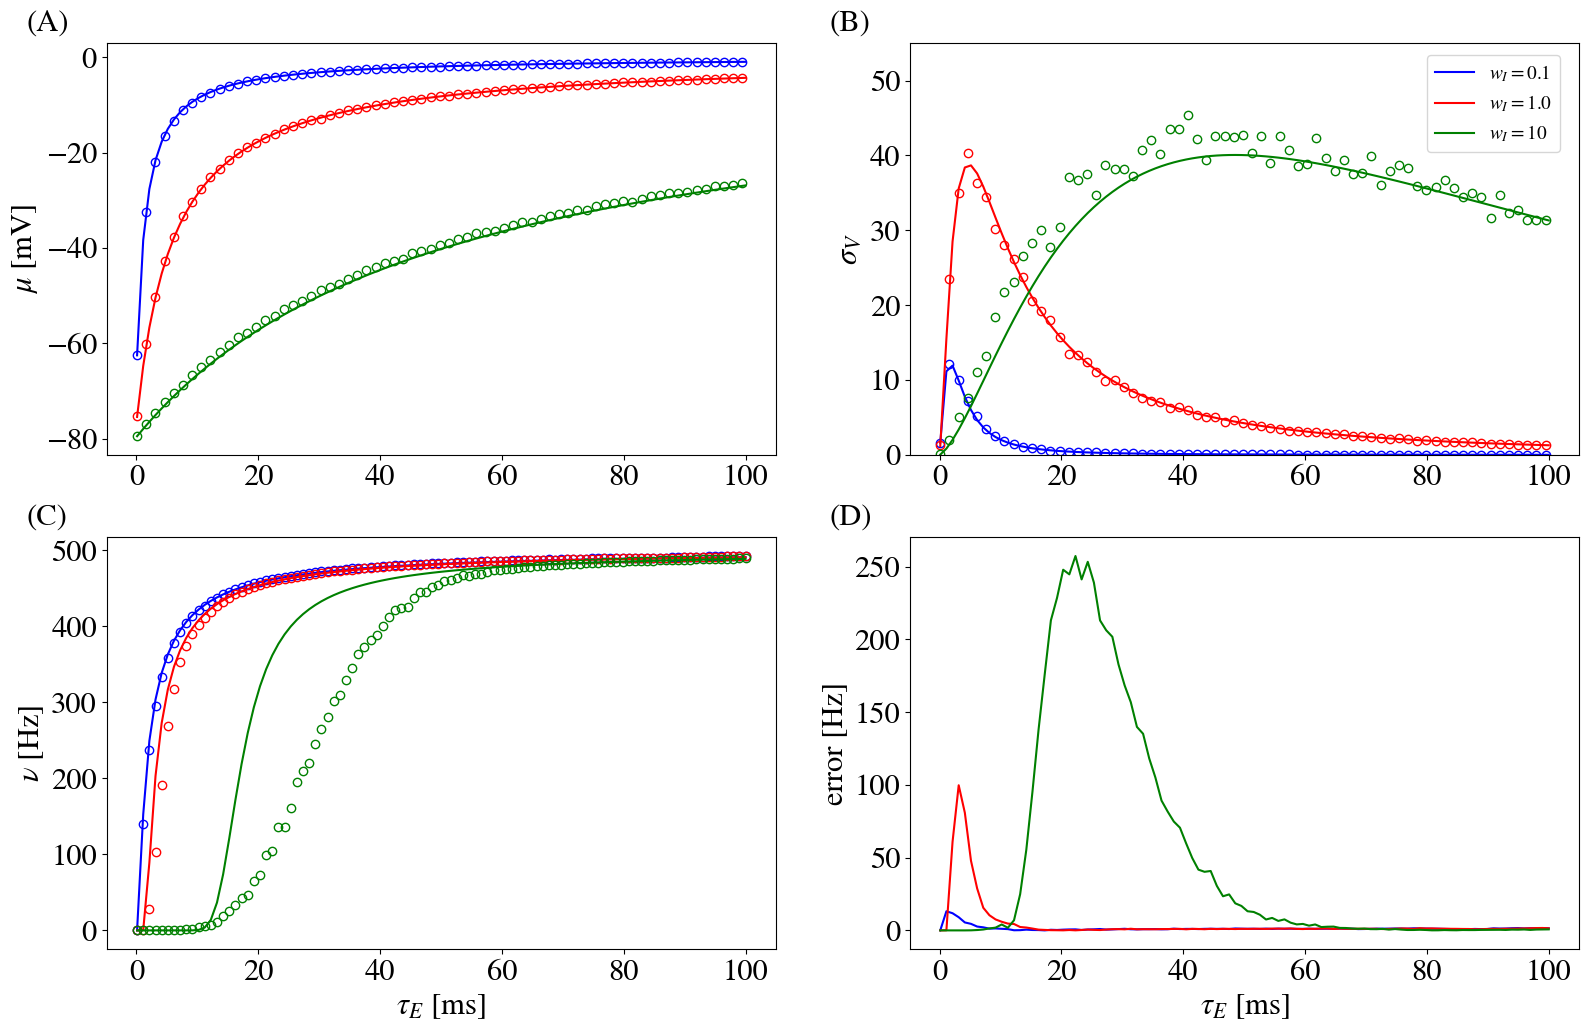

In [7]:
index = list(range(0, 200, 3))

fig, axs = plt.subplots(2, 2, figsize=(19,12), dpi=100, squeeze=False)
axs[0][0].annotate("(A)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[1][0].annotate("(C)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[1][1].annotate("(D)", xy=(-0.12, 1.03), xycoords="axes fraction")

axs[1][0].set_xlabel(r'$\tau_E$ [ms]')
axs[1][1].set_xlabel(r'$\tau_E$ [ms]')
axs[0][0].set_ylabel(r'$\mu$ [mV]')
axs[0][1].set_ylabel(r'$\sigma_V$')
axs[1][0].set_ylabel(r'$\nu$ [Hz]')
axs[1][1].set_ylabel(r'error [Hz]')

# axs[0][0].set_ylim(-80, 0)
axs[0][1].set_ylim(0, 55)

axs[0][0].plot(vec_tau_E, df_mu[vec_w_I[0]], 'b-', label=r'$w_I = 0.1$')
axs[0][0].plot(df_mu_sim['tau_E'][index], df_mu_sim[vec_w_I[0]][index], 'bo', markerfacecolor='none')
axs[0][0].plot(vec_tau_E, df_mu[vec_w_I[1]], 'r-', label=r'$w_I = 1.0$')
axs[0][0].plot(df_mu_sim['tau_E'][index], df_mu_sim[vec_w_I[1]][index], 'ro', markerfacecolor='none')
axs[0][0].plot(vec_tau_E, df_mu[vec_w_I[2]], 'g-', label=r'$w_I = 10$')
axs[0][0].plot(df_mu_sim['tau_E'][index], df_mu_sim[vec_w_I[2]][index], 'go', markerfacecolor='none')

axs[0][1].plot(vec_tau_E, df_sigma_V[vec_w_I[0]]/2, 'b-')
axs[0][1].plot(df_sigma_V_sim['tau_E'][index], df_sigma_V_sim[vec_w_I[0]][index], 'bo', markerfacecolor='none')
axs[0][1].plot(vec_tau_E, df_sigma_V[vec_w_I[1]]/2, 'r-')
axs[0][1].plot(df_sigma_V_sim['tau_E'][index], df_sigma_V_sim[vec_w_I[1]][index], 'ro', markerfacecolor='none')
axs[0][1].plot(vec_tau_E, df_sigma_V[vec_w_I[2]]/2, 'g-')
axs[0][1].plot(df_sigma_V_sim['tau_E'][index], df_sigma_V_sim[vec_w_I[2]][index], 'go', markerfacecolor='none')

axs[1][0].plot(vec_tau_E, df_nu[vec_w_I[0]]*1000, 'b-')
axs[1][0].plot(vec_tau_E, df_nu_sim[vec_w_I[0]], 'bo', markerfacecolor='none')
axs[1][0].plot(vec_tau_E, df_nu[vec_w_I[1]]*1000, 'r-')
axs[1][0].plot(vec_tau_E, df_nu_sim[vec_w_I[1]], 'ro', markerfacecolor='none')
axs[1][0].plot(vec_tau_E, df_nu[vec_w_I[2]]*1000, 'g-')
axs[1][0].plot(vec_tau_E, df_nu_sim[vec_w_I[2]], 'go', markerfacecolor='none')

axs[1][1].plot(vec_tau_E, df_error[vec_w_I[0]], 'b-')
axs[1][1].plot(vec_tau_E, df_error[vec_w_I[1]], 'r-')
axs[1][1].plot(vec_tau_E, df_error[vec_w_I[2]], 'g-')
fig.legend(bbox_to_anchor=(0.89, 0.87), loc=1, borderaxespad=0., prop={'size': 14})

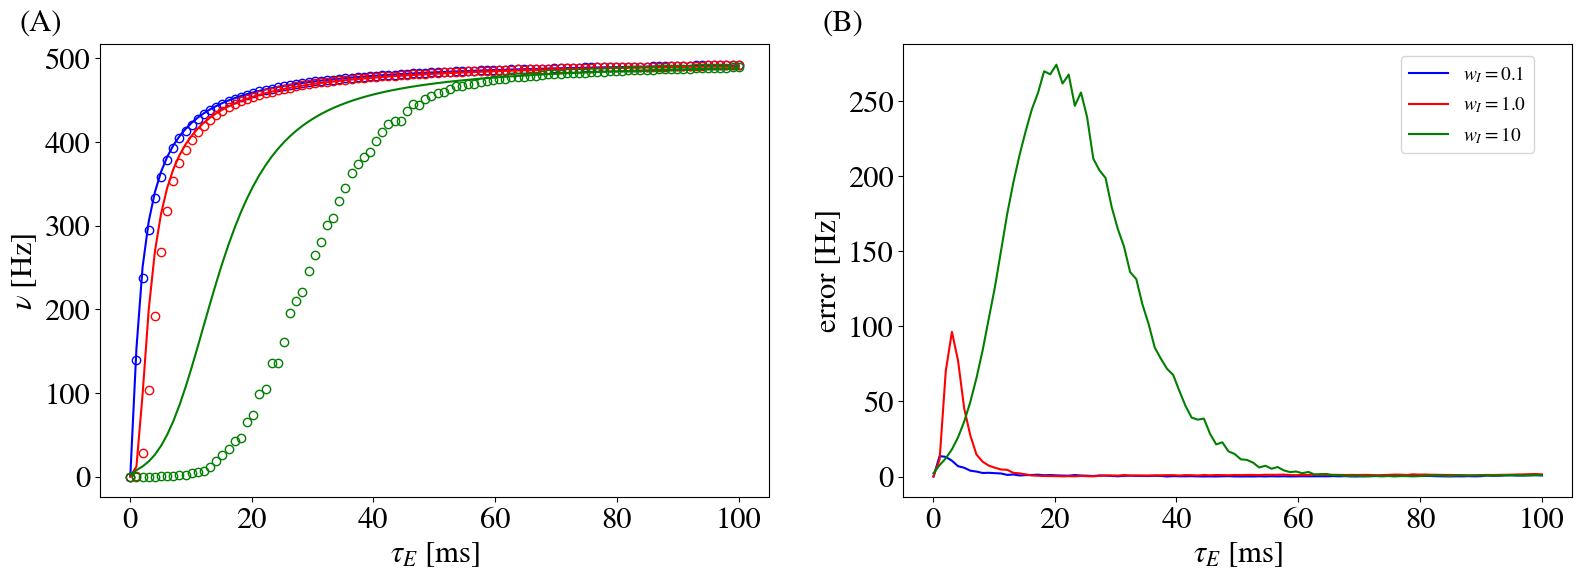

In [8]:
index = list(range(0, 200, 3))

fig, axs = plt.subplots(1, 2, figsize=(19,6), dpi=100, squeeze=False)
axs[0][0].annotate("(A)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.03), xycoords="axes fraction")

axs[0][0].set_xlabel(r'$\tau_E$ [ms]')
axs[0][1].set_xlabel(r'$\tau_E$ [ms]')
axs[0][0].set_ylabel(r'$\nu$ [Hz]')
axs[0][1].set_ylabel('error [Hz]')

axs[0][0].plot(vec_tau_E, df_nu[vec_w_I[0]]*1000, 'b-', label=r'$w_I = 0.1$')
axs[0][0].plot(vec_tau_E, df_nu_sim[vec_w_I[0]], 'bo', markerfacecolor='none')
axs[0][0].plot(vec_tau_E, df_nu[vec_w_I[1]]*1000, 'r-', label=r'$w_I = 1.0$')
axs[0][0].plot(vec_tau_E, df_nu_sim[vec_w_I[1]], 'ro', markerfacecolor='none')
axs[0][0].plot(vec_tau_E, df_nu[vec_w_I[2]]*1000, 'g-', label=r'$w_I = 10$')
axs[0][0].plot(vec_tau_E, df_nu_sim[vec_w_I[2]], 'go', markerfacecolor='none')

axs[0][1].plot(vec_tau_E, df_error[vec_w_I[0]], 'b-')
axs[0][1].plot(vec_tau_E, df_error[vec_w_I[1]], 'r-')
axs[0][1].plot(vec_tau_E, df_error[vec_w_I[2]], 'g-')
fig.legend(bbox_to_anchor=(0.88, 0.86), loc=1, borderaxespad=0., prop={'size': 14})

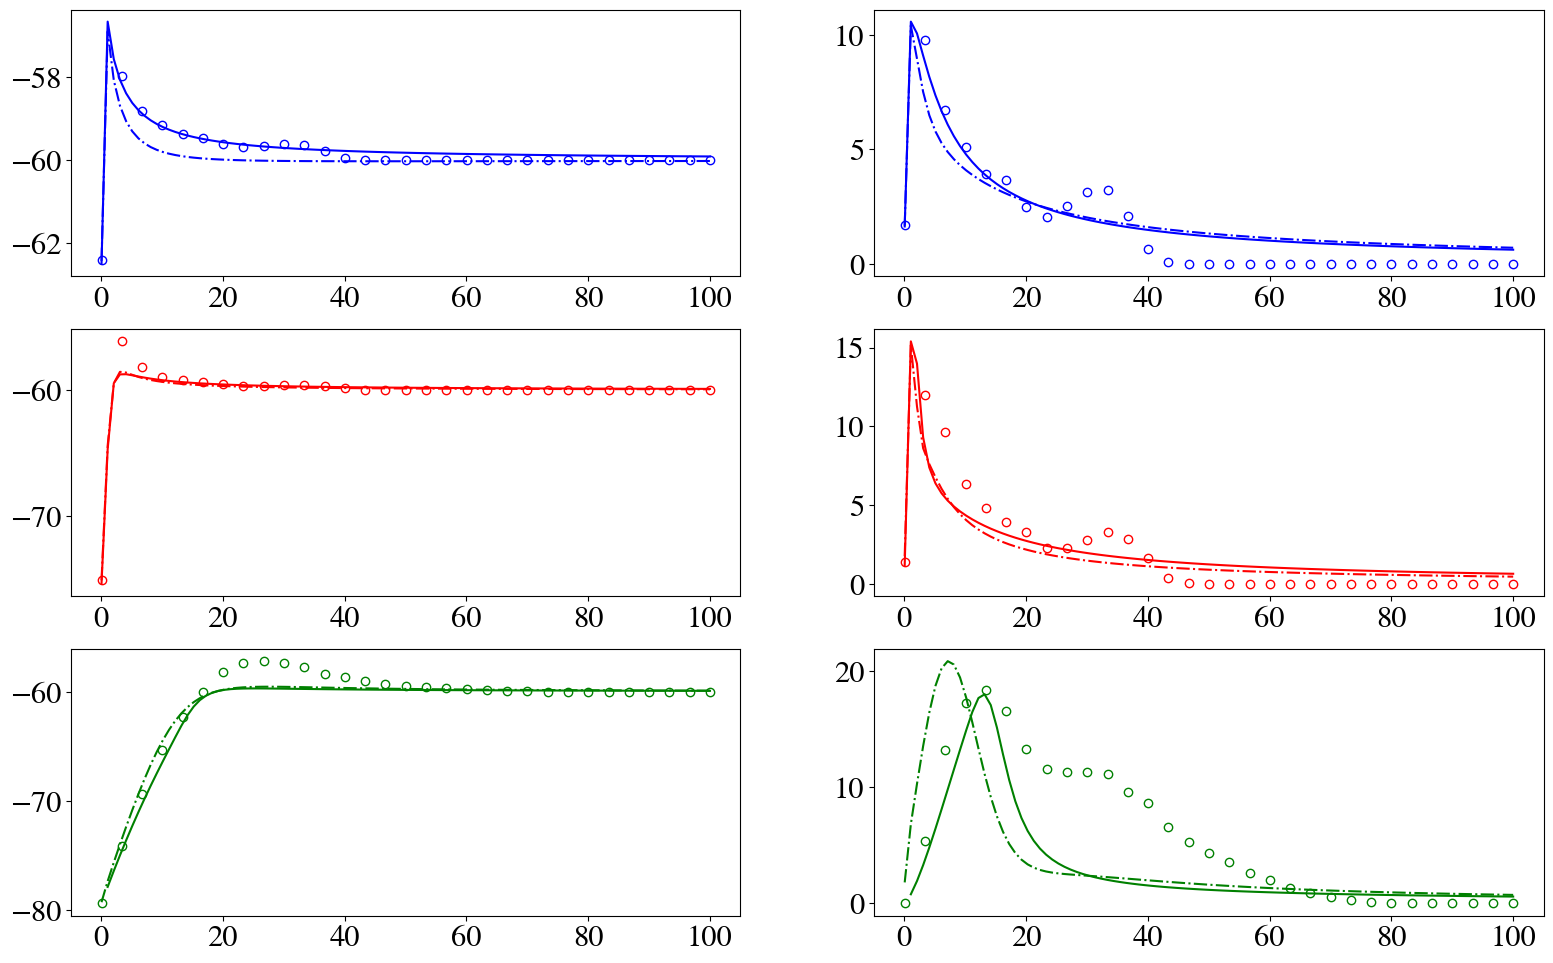

In [51]:
fig, axs = plt.subplots(3, 2, figsize=(19,12), dpi=100, squeeze=False)

axs[0][0].plot(vec_tau_E, df_mu_ad[0.1], 'b-')
axs[0][0].plot(vec_tau_E, df_mu_mul[0.1], 'b-.')
axs[0][0].plot(df_mu_sim_th['tau_E'], df_mu_sim_th[0.1], 'bo', markerfacecolor='none')
axs[1][0].plot(vec_tau_E, df_mu_ad[1], 'r-')
axs[1][0].plot(vec_tau_E, df_mu_mul[1], 'r-.')
axs[1][0].plot(df_mu_sim_th['tau_E'], df_mu_sim_th[1], 'ro', markerfacecolor='none')
axs[2][0].plot(vec_tau_E, df_mu_ad[10], 'g-')
axs[2][0].plot(vec_tau_E, df_mu_mul[10], 'g-.')
axs[2][0].plot(df_mu_sim_th['tau_E'], df_mu_sim_th[10], 'go', markerfacecolor='none')

axs[0][1].plot(vec_tau_E, df_sigma_V_ad[0.1]**2, 'b-')
axs[0][1].plot(vec_tau_E, df_sigma_V_mul[0.1]**2, 'b-.')
axs[0][1].plot(df_sigma_V_sim_th['tau_E'], df_sigma_V_sim_th[0.1], 'bo', markerfacecolor='none')
axs[1][1].plot(vec_tau_E, df_sigma_V_ad[1]**2, 'r-')
axs[1][1].plot(vec_tau_E, df_sigma_V_mul[1]**2, 'r-.')
axs[1][1].plot(df_sigma_V_sim_th['tau_E'], df_sigma_V_sim_th[1], 'ro', markerfacecolor='none')
axs[2][1].plot(vec_tau_E, df_sigma_V_ad[10]**2, 'g-')
axs[2][1].plot(vec_tau_E, df_sigma_V_mul[10]**2, 'g-.')
axs[2][1].plot(df_sigma_V_sim_th['tau_E'], df_sigma_V_sim_th[10], 'go', markerfacecolor='none')

In [30]:
df_mu_ad[0.1]

0    -62.500500
1    -56.652742
2    -57.560702
3    -58.056813
4    -58.382299
        ...    
95   -59.903577
96   -59.904566
97   -59.905534
98   -59.906483
99   -59.907413
Name: 0.1, Length: 100, dtype: float64